#Predicting the 2020 Democratic Primary Election

##Case Overview: 





The 2020 Democratic Primary Election will be a pivotal moment in American (and world) history. As such, this is an interesting and significant race to analyze and better understand. In this case study, we will explore the Democratic primary election from a variety of angles with the ultimate goal of predicting the nominee. Leveraging various data sources will enable us to understand what may influence the result. 


> ![IMG](https://drive.google.com/uc?id=12C2P4FIbKsVhZ3FGBN1o3l4ishFx0RUp)




> ![IMG](https://drive.google.com/uc?id=1oNUOQa1PkCMIT7LG_akSIDfdK7r3qZo5)




The comic refers to the fact that Nate Silver's statistical model (which is based mostly on combining information from pre-election polls) correctly predicted the outcome of the 2012 presidential race in all 50 states.







## DISCUSSION 1

In the past, the outcome of political campaigns was predicted by political analysts and pundits, using a combination of their experience, intuition, and personal biases and preferences. In recent decades there has been a shift to a more scientific approach, in which election results are predicted statistically using a poll. A small random sample of voters is asked how they will vote, and from that the result of the entire election is extrapolated. 



Discuss what factors could have lead to this shift to a more scienfitic approach in determining the outcome of political campaigns?

## DISCUSSION 2
In practice, a poll's prediction must be taken with a grain of salt, because the sample is only approximately representative of the voting population. For example, in late October 2012, the Gallup poll consistently gave Romney a 6-percentage-point lead in the popular vote, but in fact Obama won the popular vote by 2.6 percentage points. On the other hand, RAND Corporation was biased toward the Democrats and tended to overstate Obama's lead by 1.5 percentage points. 

**What could lead to a sample (in terms of polls) not representing the population?**

## DISCUSSION 3
One approach to overcome this bias is by averaging together the different polls. This is better than trusting any one of them, but it is still rather crude. What if most of them are biased? 

Silver's approach is very sophisticated, but its key idea is to combine different polls using a weighted average. In a normal average, each data point contributes equally to the result. In a weighted average, some data points contribute more than others. Silver examined how well each polling organization had predicted previous elections, and then weighted their polls according to their accuracy: more biased pollsters had less effect on the weighted average.

**Can you think of some things to consider when determining the weight of a poll (i.e. how accurate/reliable is this poll)?**

#Bias in Survey Sampling

In survey sampling, bias refers to the tendency of a sample statistic to systematically over- or under-estimate a population parameter. 


###Bias Due to Unrepresentative Samples


- Undercoverage


- Nonresponse bias. 


- Voluntary response bias.




## DISCUSSION 4

**What methods could potentially overcome selection bias?**



## Bias Due to Measurement Error

A poor measurement process can also lead to bias. In survey research, the measurement process includes the environment in which the survey is conducted,the way that questions are asked, and the state of the survey respondent.

## DISCUSSION 5 
**Can you give some examples of response bias?**



##Test Your Understanding


Which of the following statements are true?



1. Random sampling is a good way to reduce response bias. 
2. To guard against bias from undercoverage, use a convenience sample.
3. Increasing the sample size tends to reduce survey bias. 
4. To guard against nonresponse bias, use a mail-in survey.




* (A) 1 only 
* (B) 2 only 
* (C) 3 only 
* (D) 4 only 
* (E) None of the above.






##Now to the fun stuff!

In [0]:
#@title Load modules
## Load your libraries
## Libraries, also called "modules", contain functions and methods already written 
## by someone else. All you have to do is pass your argument(s) and call them yourself!


## Load the pandas module and give it the name 'pd'.
## Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd 

## Load the python plotting modules
## We don't need to import the entire matplotlib. We can just import the plotting utilities.
import matplotlib.pyplot as plt

##Load the numpy module. Numpy is 
import numpy as np

## Load the datetime module
import datetime

##We might load other modules along the way.

In [0]:
#@title Fetch Polling Data
##Now we'll fetch our polling data from FiveThirtyEight. The data for this case study is hosted at the following link. 
##Pandas has a read_csv function which takes the data_link as an argument.

data_link = "https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv"

poll_df = pd.read_csv(data_link)

##Display the first 10 rows.
poll_df.head(n=10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,119698,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,568,rv,rv-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:00,head-to-head poll,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,55.0
1,119698,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,568,rv,rv-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:00,head-to-head poll,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Sanders,13257,Bernard Sanders,45.0
2,119707,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,669,a,a-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,head-to-head poll,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,52.0
3,119707,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,669,a,a-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,head-to-head poll,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Sanders,13257,Bernard Sanders,48.0
4,119708,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,716,a,a-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,NaN,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,34.0
5,119708,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,716,a,a-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,NaN,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Warren,13258,Elizabeth Warren,9.0
6,119708,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,716,a,a-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,NaN,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
7,119708,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,716,a,a-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,NaN,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Gabbard,13343,Tulsi Gabbard,1.0
8,119709,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,590,rv,rv-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,NaN,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,40.0
9,119709,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,Ipsos,B-,590,rv,rv-d,Online,U.S. President,3/4/20,3/5/20,NaN,False,NaN,False,False,3/5/20 15:58,NaN,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Warren,13258,Elizabeth Warren,10.0


In [0]:
## Notice that the poll_id is repeated several times.
## What does each row represent?
len(poll_df['poll_id'].unique())

1036

In [0]:
#@title What features/metrics are available in this dataset? Let's take a look at the columns. 
## What features/metrics are available in this dataset? Let's take a look at the columns. 
list(poll_df.columns)

['question_id',
 'poll_id',
 'cycle',
 'state',
 'pollster_id',
 'pollster',
 'sponsor_ids',
 'sponsors',
 'display_name',
 'pollster_rating_id',
 'pollster_rating_name',
 'fte_grade',
 'sample_size',
 'population',
 'population_full',
 'methodology',
 'office_type',
 'start_date',
 'end_date',
 'sponsor_candidate',
 'internal',
 'partisan',
 'tracking',
 'nationwide_batch',
 'created_at',
 'notes',
 'url',
 'stage',
 'party',
 'answer',
 'candidate_id',
 'candidate_name',
 'pct']

## Discussion 6:

 >  ### Which metrics can provide us with the most useful insight?
 >  ### If you had to choose only one, which would it be? 
 >  ### Do any of the columns above look unusual?
 




In [0]:
#@title Name of the Polls
##Print out the names of the polls.

list_polls = list(poll_df['pollster'].unique())

print(list_polls)

['Ipsos', 'Emerson College', 'St. Pete Polls', 'Morning Consult', 'YouGov', 'Change Research', 'AtlasIntel', 'Swayable', 'Spry Strategies', 'Harris Insights & Analytics', 'Data for Progress', 'Glengariff Group Inc.', 'Point Blank Political', 'Elucd', 'Suffolk University', 'IBD/TIPP', 'East Carolina University', 'High Point University', 'Trafalgar Group', 'Marist College', 'Starboard Communications', 'SurveyUSA', 'Fox News/Beacon Research/Shaw & Co. Research', 'MassINC Polling Group', 'SSRS', 'Univision/University of Houston/Latino Decisions/North Star Opinion Research', 'University of Texas at Tyler', 'Public Policy Polling', 'Magellan Strategies', 'Monmouth University', 'University of California, Berkeley', 'Clemson University', 'Meredith College', 'Christopher Newport University', 'Marquette University Law School', 'Saint Leo University', 'Americana Analytics', 'Florida Southern College', 'SoonerPoll.com', 'Mason-Dixon Polling & Research Inc.', 'Siena College', 'University of Massach

In [0]:
#@title Display the unique values from some columns.
## Display the unique values in each of the following columns:

## fte_grade
## methodology
## office_type
## stage


for column_name in ['fte_grade','methodology','office_type','stage']:
  list_returned = list(poll_df[column_name].unique())
  print("Column Name: ", column_name)
  print(list_returned)
  print("---------------")

Column Name:  fte_grade
['B-', 'A-', 'C+', 'B/C', 'C', nan, 'C/D', 'A/B', 'C-', 'A+', 'A', 'B', 'B+', 'D-']
---------------
Column Name:  methodology
['Online', 'IVR/Online/Text', 'Automated Phone', 'IVR/Online', 'Text', 'Live Phone', 'Online/Text', 'Live Phone/Online', 'IVR/Live Phone/Text', 'IVR/Text', 'IVR/Live Phone', 'Live Phone/Text', nan, 'Online/IVR']
---------------
Column Name:  office_type
['U.S. President']
---------------
Column Name:  stage
['primary']
---------------


## Discussion 7 
PCT is the percentage of participants that chose that answer for a given question and poll id. 

**What should pct sum up to? Why?**





### What are our main columns of interest? 

1. Candidate name
2. PCT
3. Pollster Rating

Let's begin by doing some initial visualization to get a feel for the data. Our goal is to create a function that takes a poll id and graphs the pct for each candidate.

We'll do this step by step

In [0]:
#@title Code hidden.
## Now let's take everything we learned and put it into a function that
## we can call instead of having to replicate those same lines of code everytime
## we'd like to graph the polling percentage.
import pdb

def graph_poll_id(argument_poll_id):
  #pdb.set_trace()
  #Only get the rows where the column poll_id matches the poll_id passed in as an argument.
  series_poll = poll_df[poll_df["poll_id"]==argument_poll_id]
  
  #Sort
  sorted_series_poll = series_poll.sort_values(by="pct")

  
  ## Second we will remove candidates who have zero percent from the graph.
  ## We'll do this by filtering the data such that we only consider rows where
  ## the percentage is greater than 0.

  ## Let's also give each candidate a different color.
  filtered_series_poll = sorted_series_poll[sorted_series_poll['pct'] > 0]

  bars = filtered_series_poll['candidate_name']
  y_pos = np.arange(len(bars))
  performance = filtered_series_poll['pct'] 

  ## try changing the orders of the colors yourself!
  
  colors = 'rgbkymc'  #red, green, blue, black, etc.
  plt.barh(y_pos, performance, color=colors,align='center', alpha=0.5)
  plt.yticks(y_pos, bars)
  plt.xlabel('PCT')
  
  
  ## Third we will we will add some metadata (poll name, sample size, date) to give more context.
  date_of_poll = list(filtered_series_poll['start_date'])[0]
  poll_name = list(filtered_series_poll['pollster'])[0]
  
  sample_size =  list(filtered_series_poll['sample_size'])[0]
  
  title_of_graph = "Polling Percentage \n Poll Name: {} \n Date of Poll: {} \n Sample Size: {}\n ".format(poll_name,date_of_poll,sample_size)
  plt.title(title_of_graph)

  plt.show()


[64732, 64645, 64646, 64635, 64644, 64590, 64591, 64481, 64503, 64350, 63488, 63489, 63490, 63483, 63484, 63479, 63480, 63471, 63472, 63455, 63454, 63449, 63448, 63438, 63437, 63429, 63426, 63354, 63355, 63338, 63350, 63358, 63298, 63306, 63291, 63269, 63244, 63245, 63246, 63224, 63139, 63116, 63115, 63060, 62978, 62969, 62715, 62685, 62628, 62629, 62538, 62539, 62536, 62508, 62517, 62233, 61985, 60106, 60082, 59938, 59820, 59857, 59858, 59642, 59640, 59611, 59591, 59583, 59522, 59503, 59443, 59449, 58930, 58906, 58820, 58821, 58759, 58731, 58648, 58623, 58595, 58535, 58497, 58467, 58410, 58399, 58187, 58085, 58058, 57962, 57971, 57884, 57834, 57799, 57788, 57742, 57741, 57712, 57697, 57656, 57612, 57574, 57532, 57445, 57374, 57075]


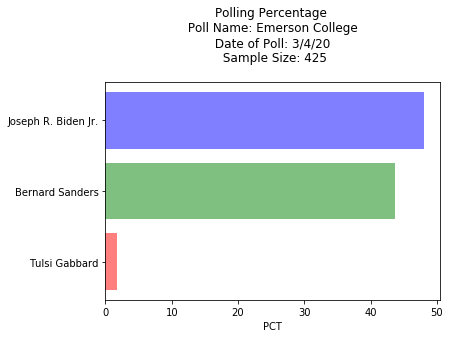

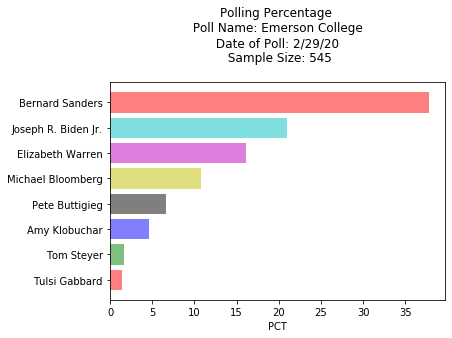

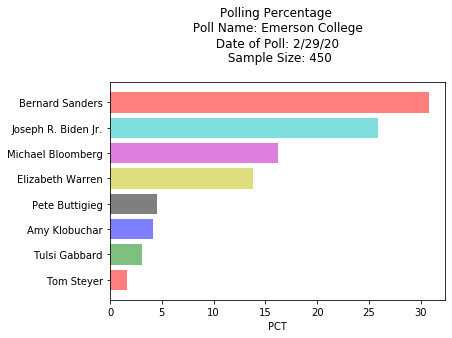

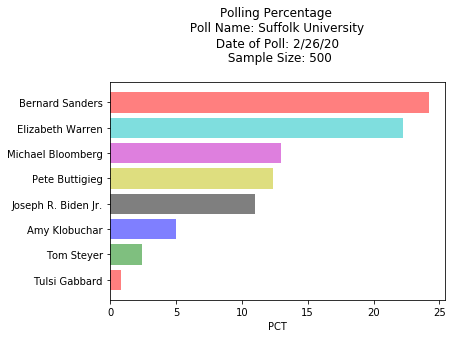

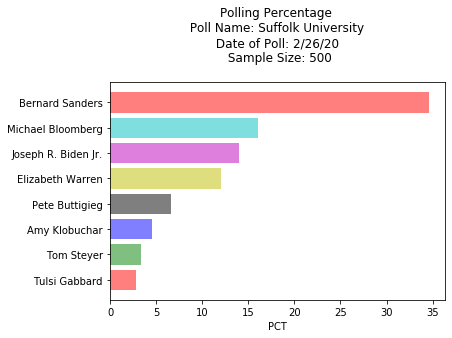

In [0]:
#@title Show results for 5 A polls.

list_A_minus_poll_ids = list(poll_df[poll_df['fte_grade'] == "A-"]["poll_id"].unique())

print(list_A_minus_poll_ids)

## To get the first 5 elements in a list: use splicing list[:5]
for poll_id in list_A_minus_poll_ids[:5]:
  graph_poll_id(poll_id)
  


## Reminder: Polls are approximate! 


## First, let's look at who the candidates are more closely.

In [0]:
#@title Who are the candidates? How many candidates are there?
## Who are the candidates? 
candidates_object = poll_df["candidate_name"].unique()
print(candidates_object)

## How many candidates are there? 
len(candidates_object)


['Joseph R. Biden Jr.' 'Bernard Sanders' 'Elizabeth Warren'
 'Tulsi Gabbard' 'Michael Bloomberg' 'Pete Buttigieg' 'Amy Klobuchar'
 'Tom Steyer' 'Donald Trump' 'William F. Weld' 'Roque De La Fuente'
 'Michael F. Bennet' 'Cory A. Booker' 'Julián Castro' 'John K. Delaney'
 'Joe Sestak' 'Marianne Williamson' 'Joe Walsh' 'Deval Patrick'
 'Andrew Yang' 'Mosie Boyd' 'Michael Ellinger' 'Mark Stewart Greenstein'
 'Mike Pence' 'Kamala D. Harris' 'Robert Wells' 'Nathan Bloxham'
 "Beto O'Rourke" 'Steve Bullock' 'Wayne Messam' 'Kirsten E. Gillibrand'
 'Mike Gravel' 'Eric Swalwell' 'Tim Ryan' 'Hillary Rodham Clinton'
 'Bill de Blasio' 'Jay Robert Inslee' 'John Kerry' 'Mark Sanford'
 'John Hickenlooper' 'Mitt Romney' 'John Richard Kasich' 'Michelle Obama'
 'Seth Moulton' 'Terry R. McAuliffe' 'Nimrata R. Haley'
 'Stacey Yvonne Abrams' 'Bob Corker' 'Marco Rubio' 'Larry Hogan'
 'Howard Schultz' 'Barack Obama' 'Jeff Flake' 'Jamie Dimon'
 'Dwayne Johnson' 'Margaret Wood Hassan' 'Michael Avenatti' 'Andrew 

79

## DISCUSSION 8

###1.   Any unusual names there?
###2.   Any names you haven't heard of?
###3.   Any names that dropped out?
###4.   Any names that do not belong to the Democratic party?

Since the group of those that are not running is much larger than those that are still running, we will create a list of those candidates that are still running.
We will only consider those candidates. 

As of March 6, 2020, there are only two candidates left in the primary. 

In [0]:
#@title Candidates still left in the primary
## 
list_candidates = list(candidates_object[:2])
print(list_candidates)
print(len(list_candidates))

['Joseph R. Biden Jr.', 'Bernard Sanders']
2


# Let's get a polling average.

Since there's a lot of polling data, let's focus on the polls from the first half of 2019. This means we will only consider polls conducted between Jan. 1 and June 30, 2019. 

Our goal is to match the following numbers [in this 538 chart](https://fivethirtyeight.com/features/what-weve-gleaned-about-the-democratic-primary-from-6-months-of-polls/). See the chart with the title: "How the 2020 Democratic primary field looks six months in."


In [0]:
#@title Get Polling Average from November 1, 2019 to March 5, 2020
## First look at the columns we'll use to filter the data. 
## Columns: 'start_date' and 'end_date'
#print(poll_df['start_date'])

#print("-------------------this is just to seperate the two print statements----------------")

## DIY: Print the end_date column 
## Remove next line
#print(poll_df['end_date'])
## Now for us to be able to do manipulations (comparisons) on this data
## we need to format it first. We can use pandas to change the formatting.
## The returned value of pd.datetime is a timestamp object for comparisons
## i.e. its not just a string. 

## Create a new column called formatted_start_date use the format m/d/y

poll_df['formatted_start_date'] = pd.to_datetime(poll_df['start_date'], format='%m/%d/%y')

##DIY: create the formatted end date column
## Remove next line
poll_df['formatted_end_date'] = pd.to_datetime(poll_df['end_date'], format='%m/%d/%y')
## See the difference? 
poll_df['formatted_start_date'] 
## Now our conditions are that the poll's start date must be 
## between 1/1/2019 and 6/30/2019. 

## Let's create a january 1st timestamp object with the same format
## as "formatted_start_date" column.

#jan_1st_date = pd.to_datetime("1/1/19", format='%m/%d/%y')
jan_1st_date = pd.to_datetime("11/1/19", format='%m/%d/%y')
#print(jan_1st_date)
#print(type(jan_1st_date))
## DIY: Create the june 30, 2019 timestamp same as above. 
## Remove next line
#june_30th_date = pd.to_datetime("6/30/19", format='%m/%d/%y')
june_30th_date = pd.to_datetime("3/5/20", format='%m/%d/%y')
#print(june_30th_date)

## Now we will create boolean conditions to filter our pandas dataframe

#Anytime on or after 1/1/19
condition_1 = (poll_df['formatted_start_date'] >= jan_1st_date)

## DIY: Create the condition for anytime on or before 6/30/19
# Remove next line
condition_2 = (poll_df['formatted_start_date'] <= june_30th_date)

#Only consider democratic candidates!
condition_3 = (poll_df['party'] == "DEM")

#Only consider those candidates that are still running.
condition_4 = (poll_df['candidate_name'].isin(list_candidates))

# Apply the conditions! F for filtered.
f_poll_df = poll_df[condition_1 & condition_2 & condition_3 & condition_4]

## print out the filtered data frame
#print(f_poll_df)

## Now we will only look at the two important columns: candidate_name and pct
f_poll_df = f_poll_df[['candidate_name','pct']]

## print it out now. which columns are showing?
#print(f_poll_df)

## Now group by candidate name
grouped_poll_df = f_poll_df.groupby("candidate_name")

## For each group (candidate), take the mean.
mean_groups = grouped_poll_df.mean()

## Then sort the values by pct. 
mean_groups.sort_values(by="pct",ascending=False)

,pct
candidate_name,
Bernard Sanders,24.540376
Joseph R. Biden Jr.,24.436170


## What can we say now?

We just added another layer of information by 
1. using the PCT
2. averaging the PCTs

Can we make our prediction even better? What factors can we further consider that would provide us with more information?



## What about a weighted average? 


### What is a weighted average?

A weighted average or mean is one where each item being averaged is multiplied by a number (weight) based on the item's relative importance, rather than treating each item equally. The weights or weightings are the equivalent of having that many similar items with the same value involved in the average. The result is summed and the total is divided by the sum of the weights.

#### What is the weight in an arithmetic average? 
An arithmetic average can be considered a special case where all values are valued (weighted) equally.





## Discussion 9
Give an everyday example of a weighted average in real life. 



##Which weighting scheme will we use? 

Older data contains more random noise than recent data: You not only have the random noise from sampling error, but also from the changes in polls that build up over time. By reducing the weight of this less reliable data, we diminish that noise.

If we keep reducing the weight of old data, though, we eventually hit a point where we start throwing out more useful information than random noise, and going any further starts to make our estimate worse. 

Weighting depends partially on how much the polls changes from day to day, but it also depends on how much you can tell about the underlying trends from your data. In general, the more your recent observations tell you about the underlying candidate favorability, or the more data you have, the more aggressively you can discount past results.



In [0]:

f_poll_df = poll_df[condition_1 & condition_2 & condition_3 & condition_4]

f_poll_df['step'] = june_30th_date - f_poll_df['formatted_start_date']


f_poll_df = f_poll_df[['candidate_name','formatted_start_date','pct','step']]
f_poll_df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,candidate_name,formatted_start_date,pct,step
0,Joseph R. Biden Jr.,2020-03-04,55.0,1 days
1,Bernard Sanders,2020-03-04,45.0,1 days
2,Joseph R. Biden Jr.,2020-03-04,52.0,1 days
3,Bernard Sanders,2020-03-04,48.0,1 days
4,Joseph R. Biden Jr.,2020-03-04,34.0,1 days
...,...,...,...,...
5107,Bernard Sanders,2019-11-01,15.0,125 days
5123,Joseph R. Biden Jr.,2019-11-01,24.0,125 days
5124,Bernard Sanders,2019-11-01,15.0,125 days
5236,Joseph R. Biden Jr.,2019-11-01,26.0,125 days


## Exponentially Decaying Weights 


We will use exponentially decaying weights to weight more recent polls heavier than older polls. We will use this exponential decay function: α(1−α)^t



In [0]:
#@title Calculate Weighted Average

#@title Define get weight function
#We will use this exponential decay function: α(1−α)^t
## source #https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc431.htm
import math
def get_weight(a,t):
  base = math.fabs(1-a)
  val = a*math.pow(base,t)
  #print("a: {}, t: {} , val:{}".format(a,t,val))
  return val


# see https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc431.htm
sp = (june_30th_date - f_poll_df['formatted_start_date'])
##To use the function above, we need to calculate the time change, or delta, which will be the 
##step size, or t. 
deltas = sp.apply(lambda x: x.days)

##Try using t as is, and try using t/7 (a week of information, sort of normalization
##How do your results change?
weights = deltas.apply(lambda x: get_weight(a=1.9,t=x/7))
f_poll_df['weights'] = weights
f_poll_df['weights'] 
##Group by candidate and get the mean pct. Then sort the values.

grouped = f_poll_df.groupby("candidate_name")

grouped.mean().sort_values(by="pct",ascending=False)['pct']

##Now let's calculate a weighted average. 

weighted_averages = {}


for candidate in grouped.groups:
  
  group = grouped.get_group(candidate)
  
  weights_list = []
  pct_list = []
  for row_number in range(len(group)):
    row = group.values[row_number]
    
    pct = row[2]
    weight = row[4]
    weights_list.append(weight)
    pct_list.append(pct)
    
  
  
  weighted_average = np.average(a=pct_list,weights=weights_list)
 
  ## Save the results in a dictionary for displaying later
  weighted_averages[candidate] = weighted_average




##Sort the results we got above, then print them out.
sorted_w_avgs = sorted(weighted_averages.items(), key=lambda x: x[1], reverse=True)

#for candidate, weighted_avg in sorted_w_avgs:
#  print(candidate, weighted_avg)

## Here they are again side by side:

unweighted_averages = grouped.mean().sort_values(by="pct",ascending=False)['pct']

weighted_averages_series = pd.Series(dict(sorted_w_avgs))

combined_df = pd.DataFrame(weighted_averages_series)
combined_df.columns = ["weighted_average"]
combined_df['unweighted_average'] = unweighted_averages
combined_df

,weighted_average,unweighted_average
Bernard Sanders,26.555994,24.540376
Joseph R. Biden Jr.,23.994748,24.436170



## Next we will do a fun vizualization using a map of the United States.

Oftentimes, it's easier to vizualize certain data using more than just a graph. For example, our polling data includes geographic information (state in which the participants were polled). 

One way to incorporate this information is by using a chloropleth. A chloropleth map is a map in which areas are shaded or patterned in proportion to the measurement of the statiscial variable being displayed on the map, such as population density or per-capita income.

Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area or show the level of variability within a region.

##We will use a chloropleth map of the USA to vizualize the leader in each state (those that we have data for).



In [0]:
#@title Map of Each State's (Weighted Avg) Poll Leader
## Try grouping by state on this same filtered data.

## SOLUTION (will be hidden/removed)

filtered_poll_df = poll_df[condition_1 & condition_2 & condition_3][['state','candidate_name','pct']]

grouped_state_poll_df = filtered_poll_df.groupby(["state",'candidate_name'])


mean_state_df = grouped_state_poll_df.mean().sort_values(by="pct",ascending=False)


##Let's print Bernie's average in Alabama.
#print("Bernie's average in Alabama", mean_state_df['pct']['Alabama']['Bernard Sanders'])

## Your turn! Print Elizabeth Warren's average in Massachussetts and California.

##SOLUTION (will be removed/hidden later)
#print(mean_state_df['pct']['California']['Elizabeth Warren'])
#print(mean_state_df['pct']['Massachusetts']['Elizabeth Warren'])


dict_state = {}

list_means = []
for name, group in grouped_state_poll_df:
  
  
    state,candidate = name
    data = (candidate, group.mean()[0])
    if state not in dict_state.keys():
      dict_state[state] = [data]
    else:
      dict_state[state].append(data)



us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
## Let's get the leader in each state so we can plot it!
list_of_rows = []
data_max_states = {}

for state in dict_state.keys():
  list_state_means = dict_state[state]
  max_for_state = max(list_state_means, key=lambda x:x[1])
  candidate, pct = max_for_state
  state_abbrev = us_state_abbrev[state]
  
  print(state_abbrev,candidate, pct)
  row = [state_abbrev,candidate, pct]
  list_of_rows.append(row)
  #data_max_states[state] = max_for_state

df_new = pd.DataFrame(list_of_rows,columns=["State","Candidate","PCT"])



#We will need to install Plotly first on our virtual environments. Use !pip install plotly
!pip install plotly==4.1.0

##Then load the module.
import plotly.graph_objects as go

##Create the figure object
fig = go.Figure(data=go.Choropleth(
    locations=df_new['State'], # Spatial coordinates
    z = df_new['PCT'].astype(float), # Data to be color-coded
    text = df_new["Candidate"],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    #mode="text",
    colorbar_title = "PCT Percentage",
))

fig.update_layout(
    title_text = 'Leaders in Polls',
    geo_scope='usa', # limite map scope to USA
)


##Show the figure. You can hover and zoom!
fig.show()

AL Joseph R. Biden Jr. 44.65
AR Joseph R. Biden Jr. 27.433333333333334
CA Bernard Sanders 32.54318181818182
CO Bernard Sanders 31.160000000000004
CT Joseph R. Biden Jr. 33.0
DE Joseph R. Biden Jr. 35.0
FL Joseph R. Biden Jr. 33.345454545454544
GA Joseph R. Biden Jr. 34.525
IL Bernard Sanders 20.866666666666667
IA Bernard Sanders 22.02727272727273
ME Bernard Sanders 32.15
MD Bernard Sanders 24.0
MA Bernard Sanders 22.25
MI Joseph R. Biden Jr. 24.066666666666666
MN Bernard Sanders 25.75
MO Joseph R. Biden Jr. 36.50666666666667
NV Bernard Sanders 25.416666666666668
NH Bernard Sanders 24.81272727272727
NJ Bernard Sanders 24.566666666666666
NM Bernard Sanders 28.2
NY Joseph R. Biden Jr. 22.333333333333332
NC Joseph R. Biden Jr. 25.535
OH Joseph R. Biden Jr. 32.1
OK Joseph R. Biden Jr. 23.34
PA Joseph R. Biden Jr. 24.433333333333334
SC Joseph R. Biden Jr. 33.9
TN Joseph R. Biden Jr. 31.1
TX Bernard Sanders 25.960869565217394
UT Bernard Sanders 26.404999999999998
VT Bernard Sanders 52.1333333

# PART 2: DEBATE ANALYSIS 

##In this section we will see how the Democratic debates afftected the polling averages! 

#18.1 million ...
people watched the second round of the Democratic debate across NBC, MSNBC, and Telemundo, The Los Angeles Times reported, making it the MOST WATCHED Democratic debate in television history — and even more people tuned in to online livestreams. The previous viewership record for a Democratic debate took place in October 2015, when five Democratic candidates faced off as 15.4 million people watched. On Thursday night, there were twice as many candidates, and more viewers than ever before. [source](https://www.bustle.com/p/how-many-people-watched-the-democratic-debate-night-two-set-a-record-18157398)

![](https://drive.google.com/uc?id=1j8baXf9lV2jOjc6J-Az8Zq0WN9VioDxh)



The goal for this section is to use what we learned above to calculate a weighted average before and after the debate. Then we will calculate the net change between the those time periods to see how the debate might have impacted a candidates favorability in the polls. 



### For this section we will use FiveThirtyEight's pre-calculated weights for our weighted average. In addition, we will only consider a certain set of polls. 

According to Nate Silver:

>"So far, there have been five national polls conducted entirely after the debate that allow for a direct comparison to an earlier poll by the same pollster. These are the polls from Quinnipiac University, Ipsos, Morning Consult,1 YouGov and HarrisX.2 

> I weighted the polls based on sample size and the pollster’s rating, as we do for our Trump approval tracker and in our election models."

See below for the polls and their associated weights.


Polls included in the weighted average are Quinnipiac (weight 1.40), Ipsos (1.49),  Morning Consult (2.13), 
HarrisX (1.16) and YouGov (0.94).  Only candidates who participated in the debates are listed in the table.

Note: The second debate occured on July 30 and 31st.





In [50]:
#@title Pre (1 week) and Post (1 week) Debate (2/25/2020) Analysis
weights_dict = {
    'Quinnipiac University': 1.40,
    "Ipsos": 1.49,
    "Morning Consult": 2.13,
    'HarrisX': 1.16,
    "YouGov": 0.94
  
}

candidates_participated = ['Joseph R. Biden Jr.',
 'Bernard Sanders',
 'Elizabeth Warren',
 '#Kamala D. Harris',
 'Pete Buttigieg',
 #"Beto O'Rourke",
 #'Cory A. Booker',
 #'Julián Castro',
 'Amy Klobuchar']
 #'Kirsten E. Gillibrand',
 #'John K. Delaney',
 #'Tulsi Gabbard',
 #'John Hickenlooper',
 #'Jay Robert Inslee',
 #'Marianne Williamson',
 #'Andrew Yang',
 #'Wayne Messam', #didn't make it.
 #'Seth Moulton',#didn't make it.
 #'Tim Ryan',
 #'Michael F. Bennet',
 #'Steve Bullock',
 #'Bill de Blasio'
 #'Joe Sestak',#didn't make it.
 #'Tom Steyer'#didn't make it.
                  #  ]

## Remind ourselves of all the pollsters in our original dataset.
#poll_df['pollster'].unique()



##We'll reuse the code above for a more precise investigation of the pcts.

def get_weighted_averages(f_poll_df):
  f_poll_df = f_poll_df[['candidate_name','pct','pollster']]
  grouped = f_poll_df.groupby("candidate_name")
  weighted_averages = {}


  for candidate in grouped.groups:
   
    group = grouped.get_group(candidate)
    #print(candidate,group)
    weights_list = []
    pct_list = []
    for row_number in range(len(group)):
      row = group.values[row_number]
      
      pct = row[1]
      pollster = row[2]
      weight = weights_dict[pollster]
      weights_list.append(weight)
      pct_list.append(pct)



    weighted_average = np.average(a=pct_list,weights=weights_list)
    #np.mean(np.multiply(pct_list,weights_list))
    #weighted_average = np.mean(np.multiply(pct_list,weights_list))
    

    ## Save the results in a dictionary for displaying later
    weighted_averages[candidate] = weighted_average


  sorted_w_avgs = sorted(weighted_averages.items(), key=lambda x: x[1], reverse=True)

  for candidate, weighted_avg in sorted_w_avgs:
    print(candidate, weighted_avg)
  return sorted_w_avgs






  #### Recycling and modularizing the code from before. 

##We'll pass the following as arguments to our function:
## - entire dataframe (this contains our polling data)
## - debate num (as of now only 2 debates have occured (6/26,27 and 7/30,31))
from datetime import datetime, timedelta


def before_after_debate(poll_df,debate_num):
  
  ## Now we will create boolean conditions to filter our pandas dataframe
  if debate_num == 1:
    print("Will analyze debate ONE \n")
    night_one = pd.to_datetime("6/26/19", format='%m/%d/%y')
    night_two = pd.to_datetime("6/27/19", format='%m/%d/%y')
  elif debate_num == 2:
    print("Will analyze debate TWO \n")
    night_one = pd.to_datetime("7/30/19", format='%m/%d/%y')
    night_two = pd.to_datetime("7/31/19", format='%m/%d/%y')
    days_to_subtract = 7
    timeframe_before = night_one - timedelta(days=days_to_subtract)
    
  elif debate_num == 3:
    
    night_one = pd.to_datetime("2/25/20", format='%m/%d/%y')
    night_two = pd.to_datetime("2/25/20", format='%m/%d/%y')
    days_to_subtract = 7
    timeframe_before = night_one - timedelta(days=days_to_subtract)
  
  #aug_7_date = pd.to_datetime("8/07/19", format='%m/%d/%y')
  
  #condition_before = (poll_df['formatted_start_date'] < night_one)
  condition_before = (poll_df['formatted_start_date'] < night_one) & (poll_df['formatted_start_date'] > timeframe_before)
  
  
  ##to copy Nate Silver, do only until august 7th
  #condition_after = (poll_df['formatted_start_date'] > night_two) & (poll_df['formatted_end_date'] < aug_7_date) 
  #condition_after = (poll_df['formatted_start_date'] >= night_one) & (poll_df['formatted_end_date'] <= aug_7_date) 
  condition_after = (poll_df['formatted_start_date'] >= night_one) & (poll_df['formatted_end_date'] <= pd.to_datetime("3/1/20", format='%m/%d/%y')) 
  
  ## The pollster is one of the 5 listed above.
  condition_1 = (poll_df['pollster'].isin(weights_dict.keys()))
 
  #Only consider democratic candidates!
  condition_2 = (poll_df['party'] == "DEM")

  #Only consider those candidates that are still running.
  condition_3 = (poll_df['candidate_name'].isin(candidates_participated))
  print(candidates_participated)
  
  # Apply the conditions! F for filtered.

  common_conditions = (condition_1 & condition_2 & condition_3)

  data_before =  poll_df[common_conditions & condition_before]
  data_after =  poll_df[common_conditions & condition_after]
  
  ## Perform some basic checks on our filtered datasets. 
  ## check the columns 
  #print(data_before.head(n=5))
  #print(data_after.head(n=5))
  
  ###
  #print(data_before['formatted_start_date'].unique())
  
  ##check the number of rows
  #print(len(data_before))
  #print(len(data_after))
  ##check that we only use the specified pollsters
  #print(data_before["pollster"].unique())
  #print(data_after["pollster"].unique())
  
  sorted_before_w_avgs = get_weighted_averages(data_before)
  #print("-----------\n\n----------") #for seperation 
  sorted_after_w_avgs = get_weighted_averages(data_after)

  return sorted_before_w_avgs, sorted_after_w_avgs





## Call our function and save the results so we can use them later!

sorted_before_w_avgs, sorted_after_w_avgs = before_after_debate(poll_df, 3)



#sorted_before_w_avgs.keys ==sorted_after_w_avgs.keys
# we need to create 3 seperate lists for ordering purposes so we cn presnet the data accurately.




print(len(sorted_before_w_avgs)==len(sorted_after_w_avgs))
cand_names = []

before_pcts = []

after_pcts = []

net_changes = []

for i in range(len(sorted_before_w_avgs)):
  tuple_before = sorted_before_w_avgs[i]
  cand_b = tuple_before[0]
  
  pct_before = tuple_before[1]
  
  ##look for the pct after the debate for that candidate
  pct_after = [tuple_a[1] for tuple_a in sorted_after_w_avgs if tuple_a[0] == cand_b][0]
  
  net_change = pct_after - pct_before
  #print(cand_b, pct_before, pct_after, net_change)
  cand_names.append(cand_b)
  before_pcts.append(pct_before)
  after_pcts.append(pct_after)
  net_changes.append(net_change)




## Load the python module with table generating functions
import plotly.graph_objects as go

#fig = go.Figure(data=[go.Table(header=dict(values=['Candidate Name', 'Before Debate','After Debate','Net Change']),
#                 cells=dict(values=[cand_names, before_pcts, after_pcts, net_changes]))
#                     ])
#fig.show()

## Limit the pcts and net changes to 2 decimal points only.

##the round function takes as an argument the element to be rounded and the number of digits to round to. 
## in our case we'd like to keep only 2 decimal points. 

rounded_before_pcts = [round(element,2) for element in before_pcts]
rounded_after_pcts = [round(element,2) for element in after_pcts]
rounded_net_changes = [round(element,2) for element in net_changes]

##TBD 
##Could be DIY 

#Decimal Red, Green, Blue, and Opacity Color Codes
#This page demonstrates the decimal representation of color of the form rgba(R,G,B,a), where R, G, and B are the decimal 
#values for the red, green, and blue values of the color on the range 0 to 255 and a is the opacity of the color (a = 0 = transparent; a = 1 = opaque). 

#https://www.december.com/html/spec/colorrgbadec.html

##Use the link above and try changing the colors and the opacity! 
##DIY

fig = go.Figure(data=[go.Table(header=dict(values=['Candidate Name', 'Before Debate','After Debate','Net Change']),
                 cells=dict(values = [cand_names, rounded_before_pcts, rounded_after_pcts, rounded_net_changes],
                           fill = dict(color=['rgb(245,245,245)',#unique color for the first column
                                              'rgb(245,245,245)',#unique color for the second column
                                              'rgb(245,245,245)',#unique color for the third column
                                             ['rgba(0,250,0, 0.3)' if val>=0 else 'rgba(250,0,0, 0.3)' for val in rounded_net_changes] 
                                             
                                             
                                             ]
                               #the cells in the second column colored with green or red, according to their values
                                         ))
                              
                              
                              )
                     ])
fig.show()


['Joseph R. Biden Jr.', 'Bernard Sanders', 'Elizabeth Warren', '#Kamala D. Harris', 'Pete Buttigieg', 'Amy Klobuchar']
Bernard Sanders 28.24950298210736
Joseph R. Biden Jr. 18.054671968190853
Elizabeth Warren 11.927435387673958
Pete Buttigieg 10.033797216699803
Amy Klobuchar 4.305168986083499
Bernard Sanders 30.062344139650875
Joseph R. Biden Jr. 22.445137157107233
Elizabeth Warren 14.164588528678305
Pete Buttigieg 9.296758104738155
Amy Klobuchar 4.203241895261844
True


## DISCUSSION 10
- How did the trends change before and after the democratic debate ? 
- Are the changes real or random fluctuations/noise? 
- Can we conclusively say that the net changes are directly due to the debates? Why or why not?


# PART 3: Linear Regression Model - Primary Winner vs. Trump?





# **An Analysis of Presidential Approval Ratings**

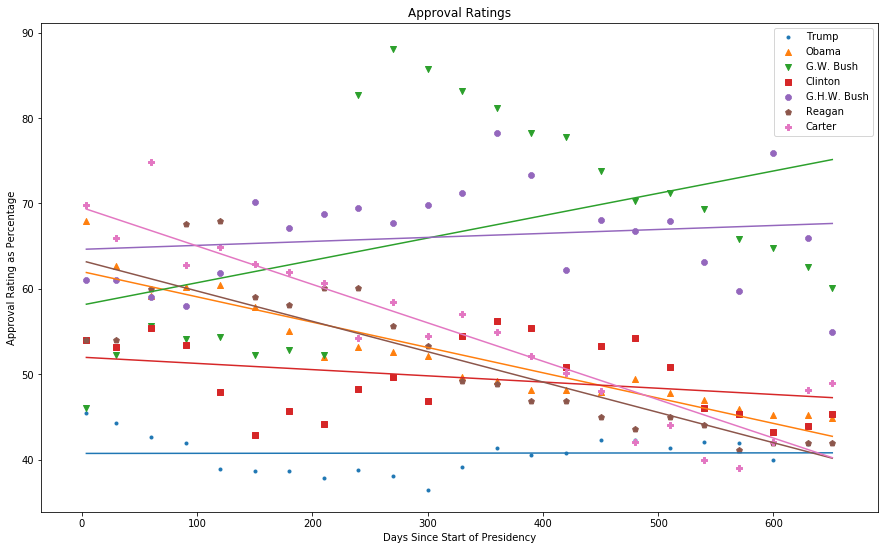

In [51]:
#@title Show Approval Ratings
# Midterm election happens at: 365*2 - 79 = 651 days into office

# Approval Rating Data
# The dates during a presidency when approval ratings are measured:
dates = [4,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,651]

# Trump
trump_approval_rate = [45.5,44.3,42.6,41.9,38.9,38.7,38.7,37.9,38.8, 38.1,36.5,39.1,41.4, 40.5,40.8,42.3,42.3,41.4,42.1,41.9,40,41.8,42.0]

# Obama (lost both house and senate in midterm)
obama_approval_rate = [68,62.7,59.2,60.2,60.4,57.9,55.1,52,53.2, 52.6, 52.1, 49.7,49.2,48.1,48.1,47.9,49.4,47.8,47, 45.9, 45.2, 45.2,44.9]

# George W Bush
gb_approval_rate = [46,52.2,55.7,54.1,54.4,52.2, 52.8,52.3,82.7,88.1,85.8,83.2,81.2,78.3,77.8,73.8,70.3,71.2,69.4,65.8,64.8,62.6,60.1]

# Clinton (lost both house and senate in midterm)
clinton_approval_rate = [54,53.2,55.4,53.4,47.9,42.9,45.7,44.2,48.3,49.7,46.9,54.5,56.2,55.4,50.9,53.3,54.2,50.8,46,45.3,43.2,43.9,45.4]

# George H. W. Bush (lost both house and senate in midterm)
ghwb_approval_rate = [61,61,59.1,58,61.9,70.2,67.1,68.8,69.5,67.7,69.8,71.2,78.3,73.3,62.2,68.1,66.8,67.9,63.2,59.8,75.9,66,54.9]

# Reagan (lost house, same senate)
reagan_approval_rate = [54,54,60,67.6,68,59,58.1,60.1,60.1,55.6,53.3,49.2,48.9,46.9,46.9,45,43.6,45,44,41.1,42,42,42]

# Carter
carter_approval_rate = [69.8,66,74.9,62.8,64.9,62.9,62,60.7,54.3,58.5,54.5,57,55,52.1,50.1,48,42.1,44,39.9,39,42.1,48.1,49]


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Before performing the regressions, we need to "reshape" the date data to transpose from being a horizontal list to
# a vertical vector of numbers... this is just something that sklearn requires
dates = np.array(dates).reshape(-1,1)
linear_regressor = LinearRegression()  # create object from the class
markers = [".", "^", "v", "s", "8", "p", "P"]
names = ["Trump", "Obama", "G.W. Bush", "Clinton", "G.H.W. Bush", "Reagan", "Carter"]
ratings = [trump_approval_rate, 
          obama_approval_rate, 
          gb_approval_rate, 
          clinton_approval_rate, 
          ghwb_approval_rate, 
          reagan_approval_rate, 
          carter_approval_rate]

# loop through all the ratings and add a scatter plot + regression line to the plot
for i, approval_rate in enumerate(ratings):
  plt.scatter(dates, approval_rate, marker=markers[i], label = names[i])
  linear_regressor.fit(dates, approval_rate)  # perform linear regression
  pred = linear_regressor.predict(dates)  # make predictions
  plt.plot(dates, pred)

plt.title("Approval Ratings")
plt.xlabel("Days Since Start of Presidency")
plt.ylabel("Approval Rating as Percentage")
plt.legend()
plt.gcf().set_size_inches(15, 9)
plt.show()

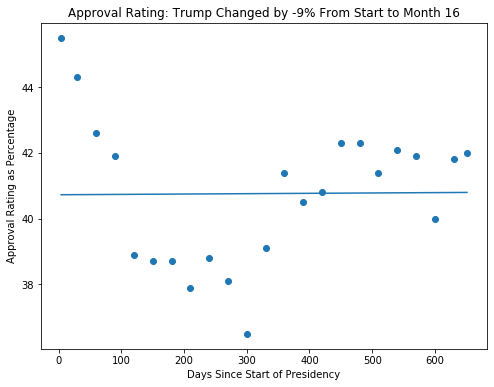

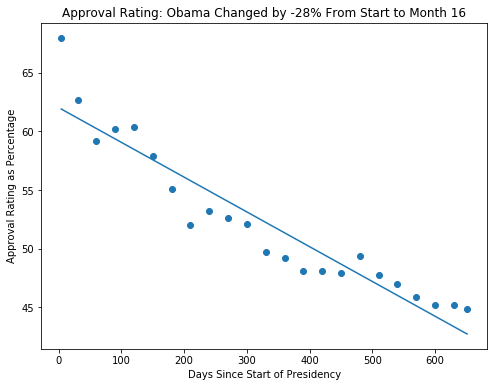

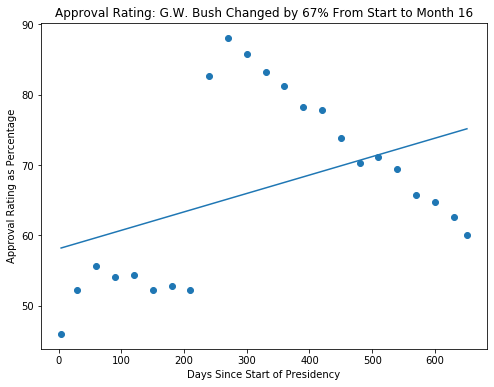

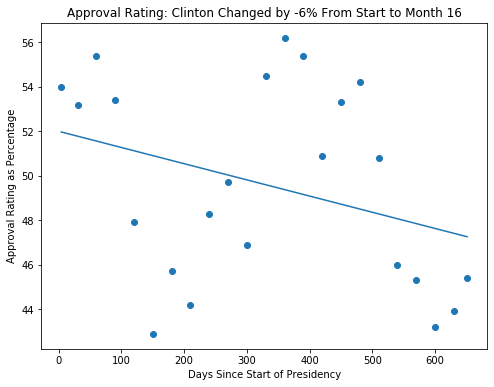

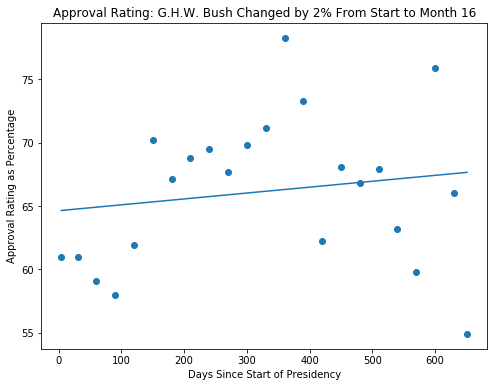

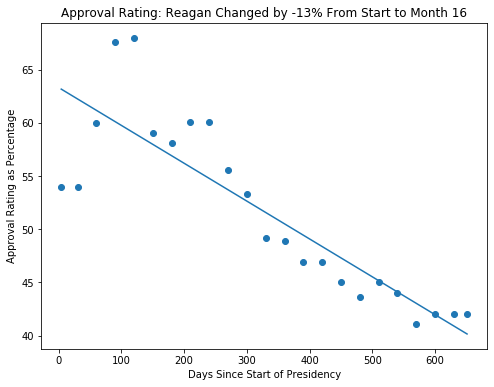

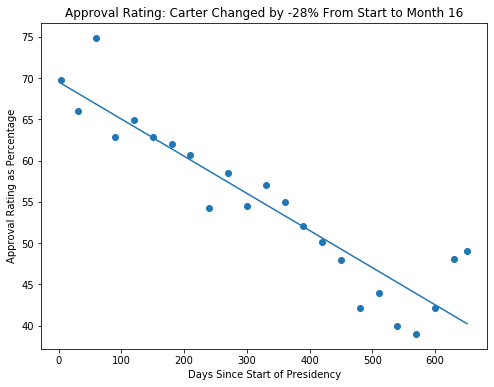

In [0]:
#@title Fit a linear regression to each president. Calculate relative % change in approval from start of presidency to day 420
# loop through all ratings and create a separate scatter plot + regression line for each one
for i, approval_rate in enumerate(ratings):
  plt.scatter(dates, approval_rate)
  linear_regressor.fit(dates, approval_rate)  # perform linear regression
  pred = linear_regressor.predict(dates)  # make predictions
  plt.plot(dates, pred)
  
  # Calculate the relative % change in approval from start of presidency to day 420
  diff = round(int(approval_rate[14] - approval_rate[0])/ int(approval_rate[0]) * 100)
  plt.title("Approval Rating: {} Changed by {}% From Start to Month 16".format(names[i], diff))
  plt.xlabel("Days Since Start of Presidency")
  plt.ylabel("Approval Rating as Percentage")
  plt.gcf().set_size_inches(8, 6)
  plt.show()

In [53]:
#@title # Load Data. You must select approval_topline.csv from your computer once downloaded from https://projects.fivethirtyeight.com/trump-approval-data/approval_topline.csv
import pandas as pd
from google.colab import files
uploaded = files.upload() # perhaps easier way to do this in google colab?
import io

# This will load in the data. You must select approval_topline.csv from your computer once downloaded
# from https://projects.fivethirtyeight.com/trump-approval-ratings/
approvals = pd.read_csv(io.StringIO(uploaded['approval_topline.csv'].decode('utf-8')))
approvals.head() # inspect first few rows of data

Saving approval_topline.csv to approval_topline.csv


,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,3/5/2020,43.439084,47.953360,38.924808,52.878107,57.361916,48.394299,16:49:45 5 Mar 2020
1,Donald Trump,Adults,3/5/2020,41.950918,45.789781,38.112055,53.138018,57.339622,48.936413,16:48:21 5 Mar 2020
2,Donald Trump,All polls,3/5/2020,42.853260,47.443586,38.262935,52.868294,57.188355,48.548233,16:47:26 5 Mar 2020
3,Donald Trump,Adults,3/4/2020,41.869315,45.711976,38.026655,53.042271,57.324208,48.760334,15:20:20 4 Mar 2020
4,Donald Trump,Voters,3/4/2020,43.830943,48.344926,39.316960,52.462662,57.102826,47.822498,15:21:45 4 Mar 2020


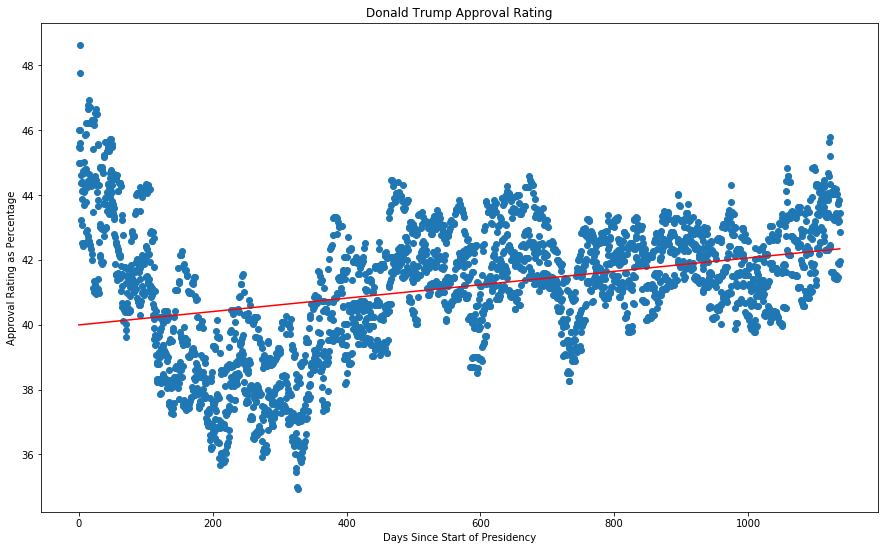

In [54]:
#@title Graph a regression of Donald Trumps approval rating (using all polls as data points)
# convert the dates from strings to pandas DateTime objects
approvals["modeldate"] = pd.to_datetime(approvals["modeldate"], infer_datetime_format=True)  

# this line converts all the DateTime objects to TimeDeltas since we would like every date to be
# the time elapsed since Trump first took office (the first poll date will suffice for the start of his presidency)
approvals["modeldate"] = (approvals["modeldate"] - approvals["modeldate"].iloc[-1])

# now we will only use the "days" portion of each TimeDelta
approvals["modeldate"] = approvals["modeldate"].map(lambda x: x.days)

# our dates now look like this! They are of type int
#approvals["modeldate"].head(10)

# Graph a regression of Donald Trumps approval rating (using all polls as data points)
# Also plot the result of every poll
dates = np.array(approvals["modeldate"]).reshape(-1,1)

plt.scatter(dates, approvals["approve_estimate"])
linear_regressor.fit(dates, approvals["approve_estimate"])  # perform linear regression
pred = linear_regressor.predict(dates)  # make predictions
plt.plot(dates, pred, "red")

plt.title("Donald Trump Approval Rating")
plt.xlabel("Days Since Start of Presidency")
plt.ylabel("Approval Rating as Percentage")
plt.gcf().set_size_inches(15, 9)
plt.show()

In [55]:
#@title Show OLS Results
# Redo the above but using a different package to perfrom regression
# this package will give us a nice output similar to what's given in R

from statsmodels.formula.api import ols

mod = ols(formula = "approve_estimate ~ modeldate", data=approvals)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       approve_estimate   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     444.0
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           9.35e-93
Time:                        04:29:26   Log-Likelihood:                -6999.3
No. Observations:                3414   AIC:                         1.400e+04
Df Residuals:                    3412   BIC:                         1.401e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9932      0.064    621.736      0.000      39.867      40.119
modeldate      0.0021    9.8e-05     21.071      0.000       0.002       0.002
==============================================================================
Omnibus:                       93.747   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.384
Skew:                           0.282   Prob(JB):                     8.92e-31
Kurtosis:                       3.810   Cond. No.                     1.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# We see that the intercept is nearls 40 and there is a slight positive slope (0.0021).
# The slope has a standard error of 9.85e-05 and it's p-value is extremely small, which indicates
# that the probability of observing this positve slope given that the true slope is 0 (null hypothesis)
# is very unlikely.

# However, we also see from the data that a linear model may not be the best fit for this data! It seems
# Trump's approval rating sank throughout the first 300 days of his presidency but now it is on a slow rise.

## DISCUSSION 11
- What assumptions are made under this analysis? 
- What assumpotions would you challenge? 
- What would you do differently?